In [2]:
import plons
import os
import numpy as np
import matplotlib.pyplot        as plt

import plons.ConversionFactors_cgs        as cgs
import plons.AccrDisk                     as ad

timeUnit = 1.5916424E-01 #yrs



In [2]:
dumps = [270,284,292,300]
xH    = '2H'
model = 'v10e00'
run   = '/lhome/jolienm/Documents/TierModels/R_Aql/cooling/binariesInPaper/finalAccrDisks/'+str(model)+'_T3000_res8_racc01/'
setup = plons.LoadSetup(run, "wind")
for dump in dumps:
    dumpData = plons.LoadFullDump(os.path.join(run, f"wind_%05d" % dump), setup)
    exit
# for dump in dumps:
#     (r,SH,Mtot,MrelRstep,Sigma,SigmaT,tau,tauT) = ad.readInfoAccrDisk(run,dump,xH)
    

In [4]:
def calcMassAccrRateDisk(Masses,times):
    MaccrRs = np.array([])
    for i in range(len(Masses)-1):
        MaccrR  = (Masses[i+1]-Masses[i])/(times[i+1]-times[i])
        MaccrRs = np.append(MaccrRs,MaccrR)
    return MaccrRs

Text(0, 0.5, 'Maccr in disk [Msun/yr]')

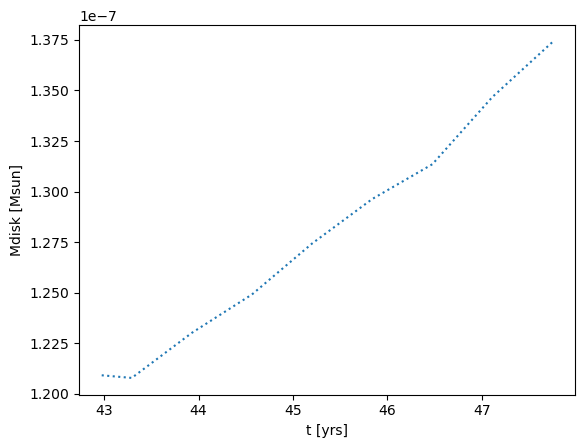

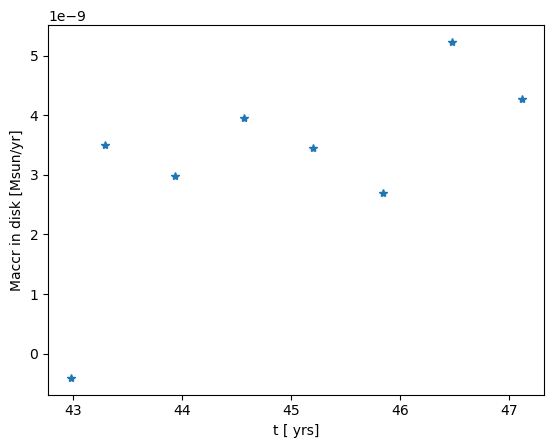

In [11]:
#v10e00, 2H
dumps = np.array([270,272,276,280,284,288,292,296,300])
Masses = np.array([1.2091e-07,1.2078e-07,1.2301e-07,1.2491e-07,1.2743e-07,1.2963e-07,1.3135e-07,1.3468e-07,1.374e-07])
times = timeUnit*dumps
plt.figure()
plt.plot(times,Masses,':')
plt.ylabel('Mdisk [Msun]')
plt.xlabel('t [yrs]')
plt.figure()
plt.plot(times[:-1],calcMassAccrRateDisk(Masses,times),'*')
plt.xlabel('t [ yrs]')
plt.ylabel('Maccr in disk [Msun/yr]')

array([2.92599824e-09, 3.07858097e-09, 4.75138134e-09])

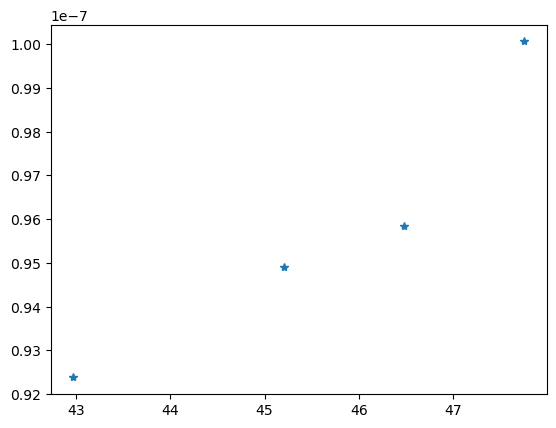

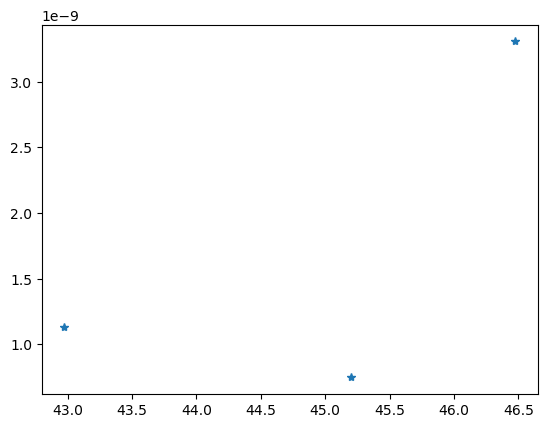

In [28]:
#v05e00, 2H
dumps = np.array([270,284,292,300])
Masses = np.array([9.238e-08,9.49e-08,9.585e-08,1.0006e-07])
times = timeUnit*dumps
plt.figure()
plt.plot(times,Masses,'*')
plt.figure()
plt.plot(times[:-1],calcMassAccrRateDisk(Masses,times),'*')

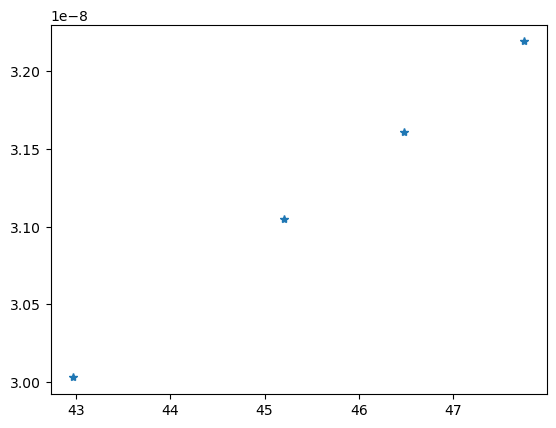

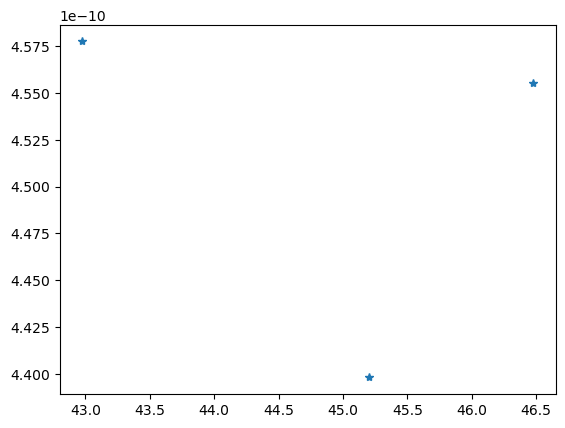

In [29]:
#v20e00, 2H
dumps = np.array([270,284,292,300])
Masses = np.array([3.003e-08,3.105e-08,3.161e-08,3.219e-08])
times = timeUnit*dumps
plt.figure()
plt.plot(times,Masses,'*')
plt.figure()
plt.plot(times[:-1],calcMassAccrRateDisk(Masses,times),'*')